In [29]:
"""Drawdown is the maximum decline from peak to trough during a specific period before a new peak is reached. 
Every trading strategy experiences drawdowns. 
Computing it helps you compare the relative riskiness between assets or strategies.
Unfortunately, most people don’t consider drawdown when managing their investments. 
Or if they do, struggle to compute it.
"""

'Drawdown is the maximum decline from peak to trough during a specific period before a new peak is reached. \nEvery trading strategy experiences drawdowns. \nComputing it helps you compare the relative riskiness between assets or strategies.\nUnfortunately, most people don’t consider drawdown when managing their investments. \nOr if they do, struggle to compute it.\n'

In [30]:
from openbb_terminal.sdk import openbb
import numpy as np

In [31]:
data = openbb.stocks.load('SPY', start_date = "2020-01-01", end_date = "2022-07-31")

Loading Daily data for SPY with starting period 2020-01-02.


In [32]:
returns = data["Adj Close"].pct_change()

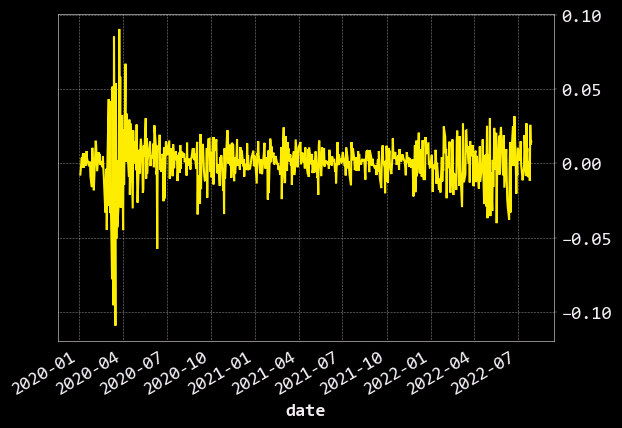

In [33]:
returns.plot(legend = None);

In [34]:
"""Drawdown is computed with 4 lines of code.
When computing returns, the first value is turned into np.nan. 
I replace it with a 0.0 to compute cumulative returns. 
Then I create a cumulative return series which is 
the cumulative product of 1 plus the return. 
Next, I use NumPy’s accumulate function. 
Accumulate tracks the running maximum value which is perfect for 
keeping tabs on the peak return.
Finally, I compute the percentage difference between the cumulative and peak returns.
"""

'Drawdown is computed with 4 lines of code.\nWhen computing returns, the first value is turned into np.nan. \nI replace it with a 0.0 to compute cumulative returns. \nThen I create a cumulative return series which is \nthe cumulative product of 1 plus the return. \nNext, I use NumPy’s accumulate function. \nAccumulate tracks the running maximum value which is perfect for \nkeeping tabs on the peak return.\nFinally, I compute the percentage difference between the cumulative and peak returns.\n'

In [37]:
def drawdown(returns):
    """Determines the drawdown 

    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative
    
    Returns
    -------
    Drawdown : pd.Series
    """

    # replace the first non value with 0.0
    returns.fillna(0.0,  inplace = True)

    # create cumulative returns
    cumulative = (returns + 1).cumprod()

    # np.maximum.accumulate takes the running max value
    # of the input series. in this case, it will maintain
    # the running maximum value. 
    # This is the running maximum return
    running_max = np.maximum.accumulate(cumulative)

    return (cumulative - running_max) / running_max

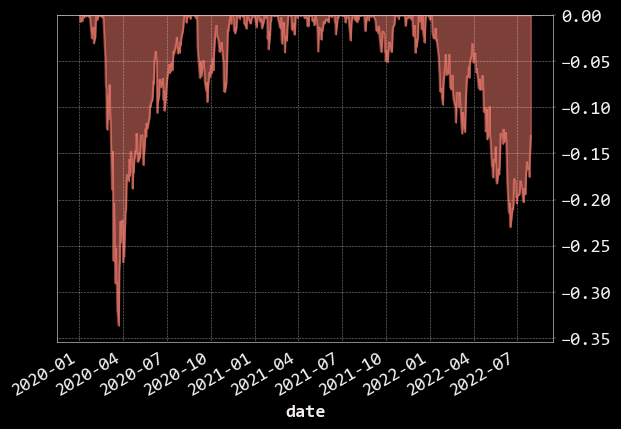

In [46]:
drawdown(returns).plot(kind = "area", color = "salmon", alpha = 0.5);

In [ ]:
"""Next, I use the drawdown to compute a max drawdown chart.

The max drawdown differs from the drawdown by tracking the maximum 
drawdown of a 30-day rolling window of returns. 
To use rolling statistics, check out this issue of The PyQuant Newsletter.
Here’s the code
"""

In [43]:
def max_drawdown(returns):
    """Determines the maximum drawdown

    Parameters
    ----------
    returns : pd.Series
        Daily reeturns of an asset, noncumulative
    
    Returns
    -------
    max_drawndown : float
    """

    return np.min(drawdown(returns))

In [44]:
max_drawdown(returns)

-0.3371726759956227

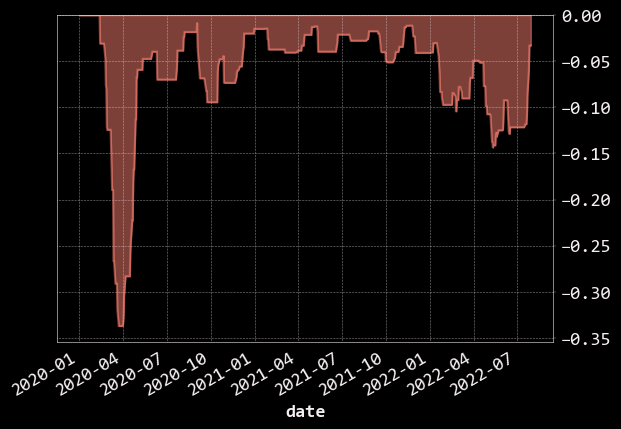

In [45]:
returns.rolling(30).apply(max_drawdown).plot(kind = "area", color = "salmon", alpha = 0.5);